## Import Data

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

In [85]:
df = pd.read_csv("income.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [86]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


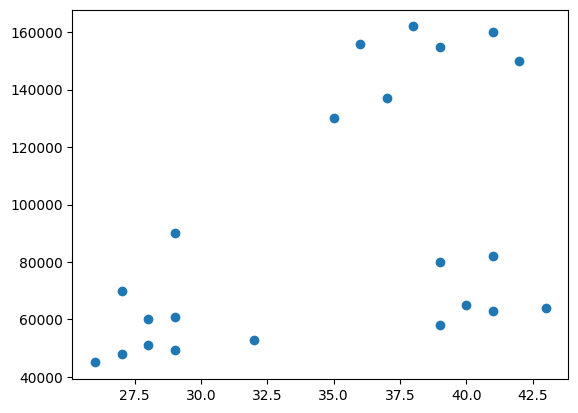

In [87]:
plt.scatter(df.Age, df['Income($)'])

In [88]:
km = KMeans(n_clusters= 3)
km

KMeans(n_clusters=3)

In [89]:
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [90]:
df['cluster'] = y_pred

In [91]:
df.head(10)

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [92]:
center = km.cluster_centers_
center

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

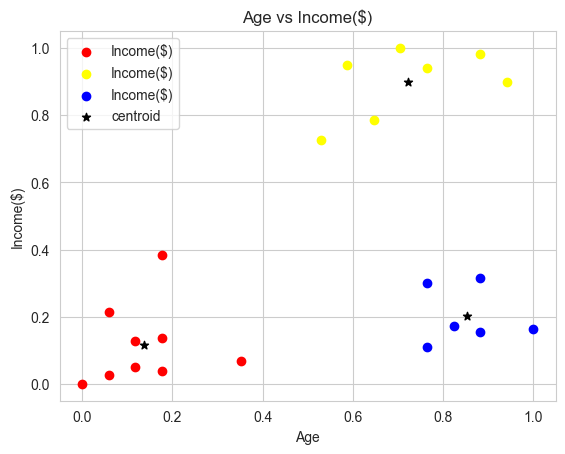

In [110]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.grid(True)
plt.scatter(df1.Age, df1['Income($)'], color = 'red', label = 'Income($)')
plt.scatter(df2.Age, df2['Income($)'], color = 'yellow', label = 'Income($)')
plt.scatter(df3.Age, df3['Income($)'], color = 'blue', label = 'Income($)')
plt.scatter(center[:,0], center[:,1], color = 'black', marker= '*', label = 'centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Age vs Income($)')
plt.legend()

You can see the scatter plot, these centroids are not in the right cluster so sow. We will fix that by using processing method named 'MinMaxScaler'

### Preprocessing using MinMaxScaler method

In [94]:
min_val = df['Income($)'].min()
min_val

max_val = df['Income($)'].max()
max_val



162000

In [95]:
#Norminalize column 'Income($)' to about (0, 1)
mms1 = []

for i in range(len(df['Income($)'])):
    y = (df['Income($)'][i] - df['Income($)'].min()) / (df['Income($)'].max() - df['Income($)'].min())
    mms1.append(y)
    
#Norminalize column 'Age' to about (0, 1)
mms2 = []

for i in range(len(df['Age'])):
    y = (df['Age'][i] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())
    mms2.append(y)


In [96]:
df['Income($)'] = mms1
df['Age'] = mms2

df.head(10)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [97]:
km = KMeans(n_clusters= 3)
km

KMeans(n_clusters=3)

In [98]:
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [99]:
df.drop('cluster', axis= 1, inplace= True)
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [100]:
df['cluster'] = y_pred
df.head(10)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [105]:
center = km.cluster_centers_
center

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

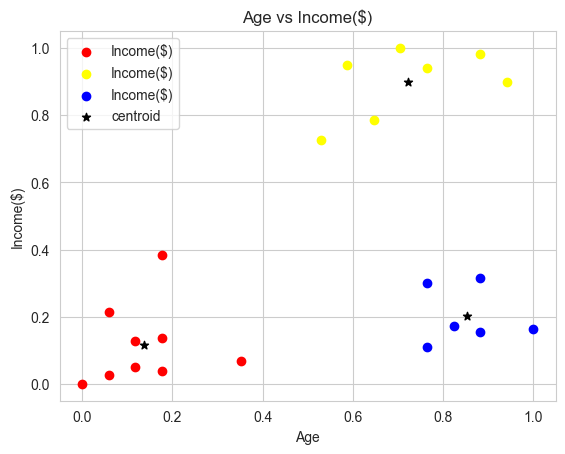

In [111]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.grid(True)
plt.scatter(df1.Age, df1['Income($)'], color = 'red', label = 'Income($)')
plt.scatter(df2.Age, df2['Income($)'], color = 'yellow', label = 'Income($)')
plt.scatter(df3.Age, df3['Income($)'], color = 'blue', label = 'Income($)')
plt.scatter(center[:,0], center[:,1], color = 'black', marker= '*', label = 'centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Age vs Income($)')
plt.legend()

### Elbow graph

In [107]:
sse = []

for k in range(1, 10):
    km = KMeans(n_clusters= k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

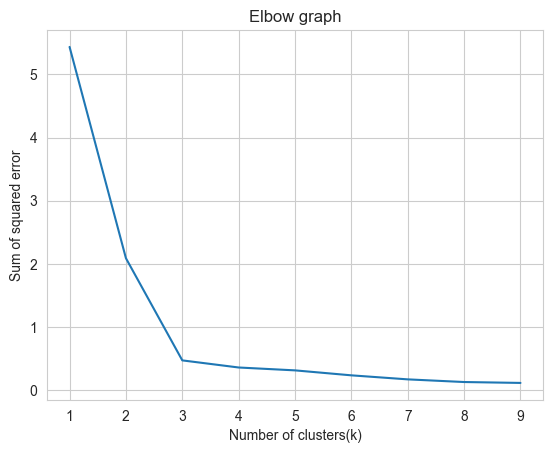

In [109]:
sns.set_style("whitegrid")

g = sns.lineplot(x = range(1,10), y = sse)
g.set(xlabel = "Number of clusters(k)",
      ylabel = "Sum of squared error",
      title = "Elbow graph")

plt.show()
